# Analysis of Data in the Athens area
Tim Bender

In [78]:
# packages for cleaning & calculation
import pandas as pd
import numpy as np
import math

# packages for plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns


# packages for map creation
import folium
import branca.colormap as cm
import os

# create folder for results
os.makedirs('images', exist_ok=True)
os.makedirs('maps', exist_ok=True)


# 1. Data Load & Wrangling

In [79]:
df = pd.read_csv('./data/athens_listings.csv')

In [80]:
# first glance on data
df.head(5)

id                                               name  host_id  \
0  10595   3 bedrooms, 2 bathrooms, 2nd floor with elevator    37177   
1  10990       Athens Quality Apartments - Deluxe Apartment    37177   
2  10993                 Athens Quality Apartments - Studio    37177   
3  10995     AQA-No2 1-bedroom, smart tv, fiber connection,    37177   
4  27262  Athens Quality Apartments - Ground floor apart...    37177   

   host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527   
1  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448   
2  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98888   23.76473   
3  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448   
4  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98924   23.76500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  108.0               1                 52  2024-06-03   
1  Entire home/apt  136.0               1                 78  2024-04-30   
2  Entire home/apt   67.0               1                 96  2024-06-20   
3  Entire home/apt   78.0               1                 32  2024-03-09   
4  Entire home/apt   58.0               1                 25  2024-01-13   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.33                               7               140   
1               0.54                               7               158   
2               0.67                               7               172   
3               0.19                               7               142   
4               0.17                               7               172   

   number_of_reviews_ltm      license  
0                     11  00002433180  
1                     13  00002433169  
2                      5  00002433010  
3                      2  00002433153  
4                      4  00002433111

In [81]:
# how many rows / columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13274 entries, 0 to 13273
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13274 non-null  int64  
 1   name                            13274 non-null  object 
 2   host_id                         13274 non-null  int64  
 3   host_name                       13274 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13274 non-null  object 
 6   latitude                        13274 non-null  float64
 7   longitude                       13274 non-null  float64
 8   room_type                       13274 non-null  object 
 9   price                           13068 non-null  float64
 10  minimum_nights                  13274 non-null  int64  
 11  number_of_reviews               13274 non-null  int64  
 12  last_review                     

In [82]:
df.describe()

id       host_id  neighbourhood_group      latitude  \
count  1.327400e+04  1.327400e+04                  0.0  13274.000000   
mean   5.434226e+17  2.409516e+08                  NaN     37.980021   
std    4.779091e+17  1.894629e+08                  NaN      0.013352   
min    1.059500e+04  1.805000e+03                  NaN     37.950322   
25%    3.725012e+07  6.571469e+07                  NaN     37.969030   
50%    6.839243e+17  1.937452e+08                  NaN     37.978470   
75%    9.882338e+17  4.382071e+08                  NaN     37.988031   
max    1.186761e+18  5.854399e+08                  NaN     38.030830   

          longitude         price  minimum_nights  number_of_reviews  \
count  13274.000000  13068.000000    13274.000000       13274.000000   
mean      23.731535    111.186027        2.613982          51.837728   
std        0.012414    198.133848       11.390476          90.000035   
min       23.701280     11.000000        1.000000           0.000000   
25%       23.723910     54.000000        1.000000           3.000000   
50%       23.729581     77.000000        2.000000          13.000000   
75%       23.737299    119.000000        2.000000          58.000000   
max       23.780220  10303.000000      444.000000         923.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       11509.000000                    13274.000000      13274.000000   
mean            1.802932                       13.176284        238.318367   
std             1.723783                       20.677374        100.346462   
min             0.010000                        1.000000          0.000000   
25%             0.490000                        1.000000        165.000000   
50%             1.190000                        4.000000        262.000000   
75%             2.660000                       16.000000        326.000000   
max            16.040000                      109.000000        365.000000   

       number_of_reviews_ltm  
count            13274.00000  
mean                14.38647  
std                 19.73688  
min                  0.00000  
25%                  1.00000  
50%                  6.00000  
75%                 20.00000  
max                207.00000

In [83]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [84]:
# missing data in the set?
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               13274
reviews_per_month                  1765
last_review                        1765
price                               206
license                             183
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
name                                  0
minimum_nights                        0
number_of_reviews                     0
host_name                             0
host_id                               0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
id                                    0
dtype: int64

Some price information are missing. therefore a cleaning is neccessary.

# 2. Data Cleaning
Baseline for the analysis will be the price, so a value for all datasets is needed.

In [85]:
df = df.dropna(subset=['price'])

print(np.percentile(df['price'], 99.999))

10136.134409999408


10136.134409999408€ is the 99.999 price. Seems like a outliner, but without deeper analysis should this not be removed

# 3. Data Analysis
### analyze price distribution

In [86]:
# Convert 'price' column to numeric data type
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [87]:
# Create histogramm of price distribution
fig1 = px.histogram(df, 
                    x='price', 
                    title='Distribution of Price', 
                    nbins=10,  # Automatically determine the number of bins
                    color_discrete_sequence=px.colors.sequential.Viridis,  # Use a color sequence for the bars
                    hover_data={'price': True})

# Layout adjustments
fig1.update_layout(xaxis_title='Price', yaxis_title='Frequency')

# Show the plot
fig1.show()

The high-price flats dominate the histogram, so a introduction of price groups could be helpful.

#### introduce price groups & Calculate distribution of price

In [88]:
# Create the price_bins and price_labels
price_bins = [0, 49, 99, 149, 199, 249, 299, float('inf')]
price_labels = ['<50 €', '50-99 €', '100-149 €', '150-199 €', '200-249 €', '250-299 €', '>300 €']

# Create the price_group column with labels
df['price_group'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

# Convert the price_group to a categorical type with a specific order
df['price_group'] = pd.Categorical(df['price_group'], categories=price_labels)

In [89]:
 # Create the histogram and explicitly sort the x-axis
fig1 = px.histogram(df['price_group'], 
                    x='price_group', 
                    category_orders={'price_group': price_labels},  # Sort the categories
                    title='Distribution of Price', 
                    color_discrete_sequence=px.colors.sequential.Jet,  # Use a color sequence for the bars
                    hover_data={'price_group': True})

# Layout adjustments
fig1.update_layout(xaxis_title='Price Group', yaxis_title='Frequency')

# Show the plot
fig1.show()

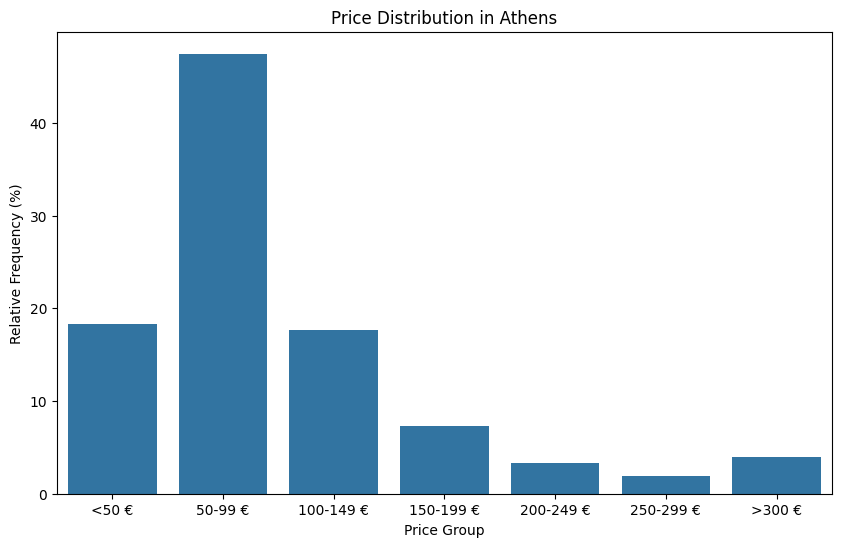

In [90]:
price_counts = df['price_group'].value_counts(normalize=True).sort_index() * 100
price_df = price_counts.reset_index()
price_df.columns = ['Price Group', 'Relative Frequency (%)']

plt.figure(figsize=(10, 6))
sns.barplot(x='Price Group', y='Relative Frequency (%)', data=price_df)
plt.title('Price Distribution in Athens')
plt.xlabel('Price Group')
plt.ylabel('Relative Frequency (%)')

plt.savefig('./images/relative_distribution.png')
plt.show()

### Price distribution per room type

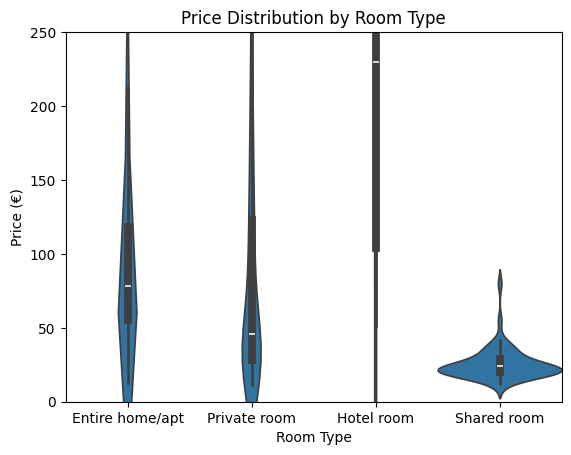

In [91]:
sns.violinplot(data=df, x="room_type", y="price",width=1.0)
plt.ylim(0, 250)
plt.xlabel("Room Type")
plt.ylabel("Price (€)") 
plt.title("Price Distribution by Room Type")
plt.savefig('./images/price_distribution_room_type.png')

### Analyze Minimum-Nights

In [92]:
print(df['minimum_nights'].describe())

count    13068.000000
mean         2.539180
std         10.075019
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        444.000000
Name: minimum_nights, dtype: float64


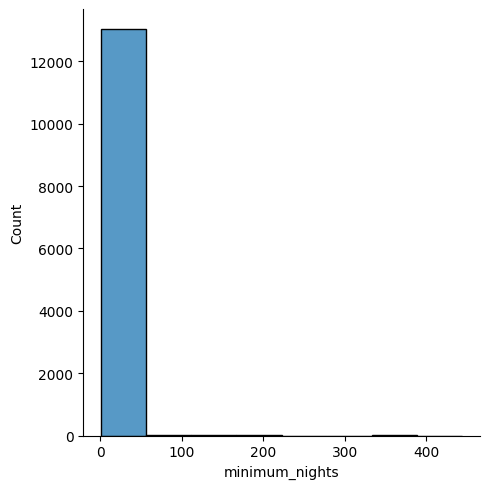

In [93]:
sns.displot(data=df, x="minimum_nights", bins=8, kde=False)

remove outliners in the visualization

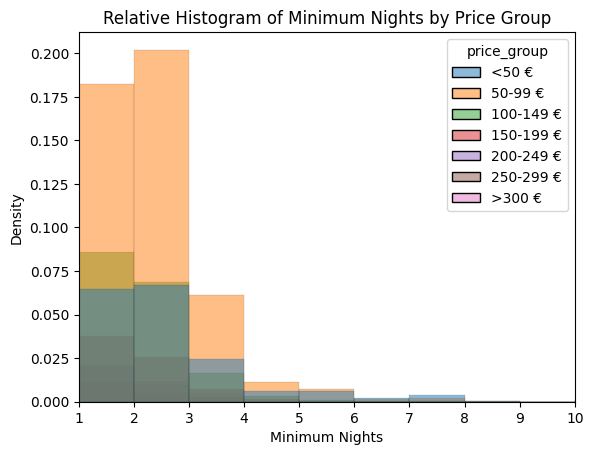

In [94]:
bin_width = 1
# Define the bin edges for the histogram.
bins = np.arange(min(df['minimum_nights']), max(df['minimum_nights']) + bin_width, bin_width)

# Relative Histogram using Seaborn
sns.histplot(data=df, x="minimum_nights", bins=bins, hue="price_group", stat='density')
plt.xlabel('Minimum Nights')
plt.title('Relative Histogram of Minimum Nights by Price Group')
plt.xlim(1, 10)
plt.savefig('./images/relative_distribution_minimum_nights.png')
plt.show()

In [95]:
grouped_stats = df.groupby('room_type')['minimum_nights'].describe()

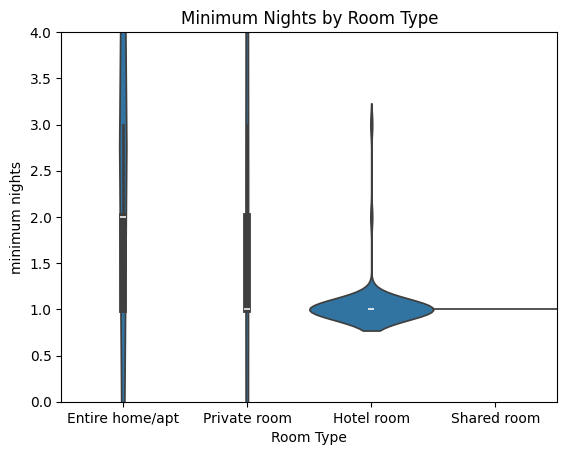

In [96]:
sns.violinplot(data=df, x="room_type", y="minimum_nights",width=1.0)
plt.ylim(0, 4)
plt.xlabel("Room Type")
plt.ylabel("minimum nights") 
plt.title("Minimum Nights by Room Type")
plt.savefig('./images/minimum_nights_room_type.png')

## Influence of neighbourhood

In [97]:
df['neighbourhood'].value_counts()

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2455
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1137
ΝΕΟΣ ΚΟΣΜΟΣ                         1025
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             954
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     825
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      547
ΠΑΓΚΡΑΤΙ                             521
ΚΟΛΩΝΑΚΙ                             435
ΑΜΠΕΛΟΚΗΠΟΙ                          429
ΘΗΣΕΙΟ                               405
ΑΚΡΟΠΟΛΗ                             403
ΠΕΤΡΑΛΩΝΑ                            374
ΚΕΡΑΜΕΙΚΟΣ                           368
ΚΥΨΕΛΗ                               272
ΓΟΥΔΙ                                238
ΙΛΙΣΙΑ                               225
ΣΤΑΔΙΟ                               222
ΖΑΠΠΕΙΟ                              183
ΠΑΤΗΣΙΑ                              171
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     162
ΛΥΚΑΒΗΤΤΟΣ                           161
ΝΙΡΒΑΝΑ                              156
ΑΝΩ ΚΥΨΕΛΗ                           130
ΓΚΥΖΗ                                117
ΑΓ

In [98]:
df['room_type'].value_counts()

room_type
Entire home/apt    12120
Private room         823
Hotel room            69
Shared room           56
Name: count, dtype: int64

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\1895127280.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



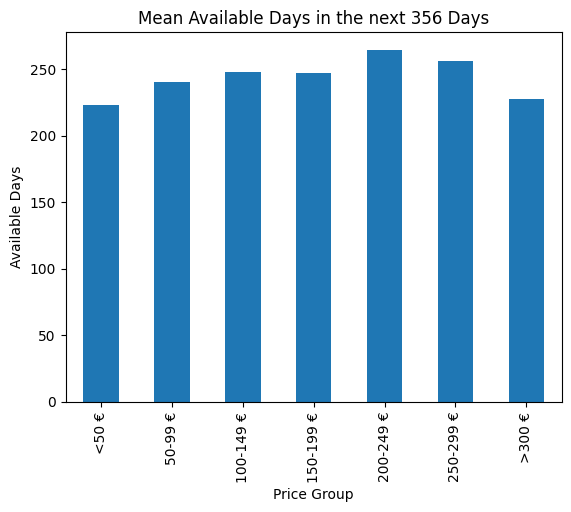

In [99]:
(df.groupby(['price_group'])['availability_365'].mean()).plot(kind='bar', legend=None)
plt.title('Mean Available Days in the next 356 Days');
plt.xlabel("Price Group")
plt.ylabel("Available Days") 
plt.savefig('./images/available_days_next_365.png')
plt.show()

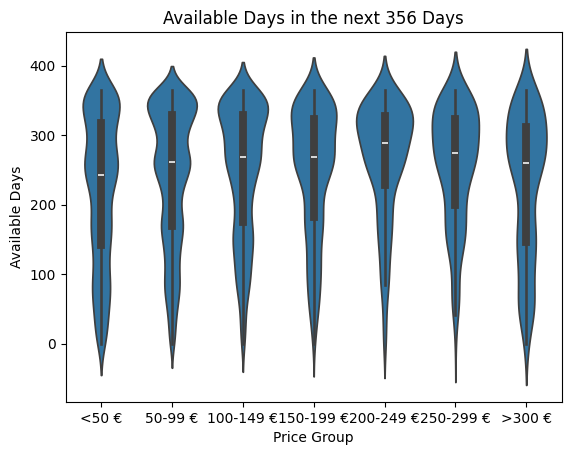

In [100]:
sns.violinplot(data=df, x="price_group", y="availability_365")
plt.title('Available Days in the next 356 Days');
plt.xlabel("Price Group")
plt.ylabel("Available Days") 
plt.savefig('./images/available_days_next_365_violin.png')
plt.show()

In [101]:
print(np.percentile(df['minimum_nights'], 99.9999999))

443.9989677070316


## Analyze the neighbourhoods / Distance from POI

In [102]:
df['neighbourhood'].unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ',
       'ΣΤΑΔΙΟ', 'ΚΟΛΩΝΑΚΙ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΑΚΡΟΠΟΛΗ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΚΕΡΑΜΕΙΚΟΣ', 'ΠΑΓΚΡΑΤΙ',
       'ΘΗΣΕΙΟ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΠΕΤΡΑΛΩΝΑ',
       'ΠΡΟΜΠΟΝΑ', 'ΓΟΥΔΙ', 'ΓΚΑΖΙ', 'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΟΛΩΝΟΣ', 'ΝΙΡΒΑΝΑ',
       'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΙΛΙΣΙΑ',
       'ΚΥΨΕΛΗ', 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΖΑΠΠΕΙΟ',
       '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΥΖΗ', 'ΝΕΑ ΚΥΨΕΛΗ',
       'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΓΟΥΒΑ', 'ΣΕΠΟΛΙΑ', 'ΑΝΩ ΚΥΨΕΛΗ', 'ΠΑΤΗΣΙΑ',
       'ΠΕΝΤΑΓΩΝΟ', 'ΠΟΛΥΓΩΝΟ', 'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',
       'ΚΟΛΟΚΥΝΘΟΥ', 'ΡΗΓΙΛΛΗΣ', 'ΡΙΖΟΥΠΟΛΗ'], dtype=object)

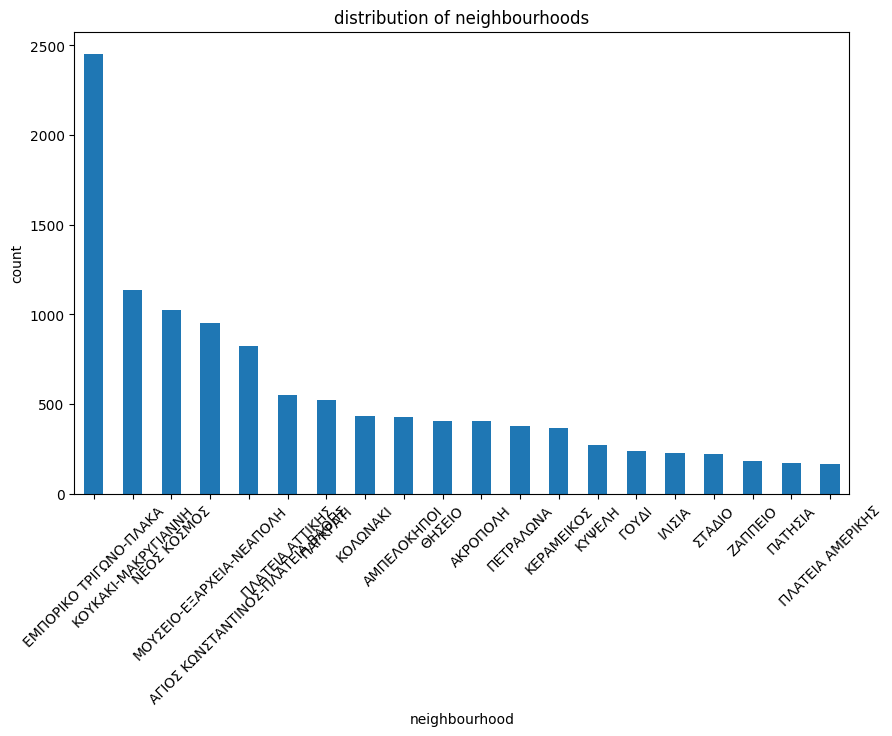

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2455
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1137
ΝΕΟΣ ΚΟΣΜΟΣ                         1025
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             954
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     825
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      547
ΠΑΓΚΡΑΤΙ                             521
ΚΟΛΩΝΑΚΙ                             435
ΑΜΠΕΛΟΚΗΠΟΙ                          429
ΘΗΣΕΙΟ                               405
ΑΚΡΟΠΟΛΗ                             403
ΠΕΤΡΑΛΩΝΑ                            374
ΚΕΡΑΜΕΙΚΟΣ                           368
ΚΥΨΕΛΗ                               272
ΓΟΥΔΙ                                238
ΙΛΙΣΙΑ                               225
ΣΤΑΔΙΟ                               222
ΖΑΠΠΕΙΟ                              183
ΠΑΤΗΣΙΑ                              171
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     162
Name: count, dtype: int64


In [103]:
plt.figure(figsize=(10, 6))
df['neighbourhood'].value_counts().head(20).plot(kind='bar')
plt.title('distribution of neighbourhoods')
plt.xlabel('neighbourhood')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

print(df['neighbourhood'].value_counts().head(20))

## Distance from POI


In [104]:
# definition of function for distance calculation
from math import cos, sqrt
def calc_distance(lat_1, long_1, lat_2,long_2):
    lat = (lat_1 + lat_2) / 2 * 0.01745
    dx = 111.3 * cos(lat) * (long_1 - long_2)
    dy = 111.3 * (lat_1 - lat_2)
    distance = sqrt(dx * dx + dy * dy)
    return distance

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\3204464551.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



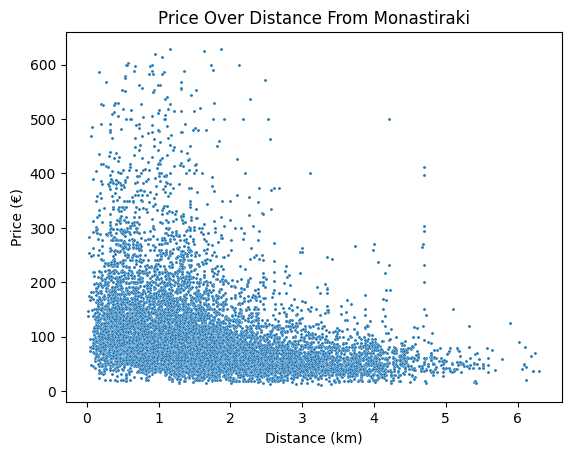

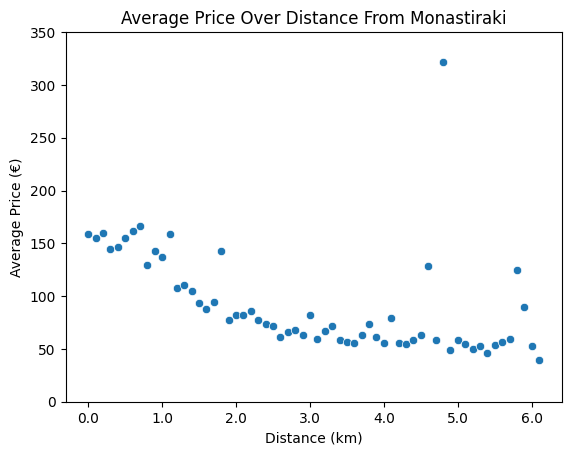

In [105]:
# Check POI Monastiraki
POI_lat=37.9761
POI_lon=23.7254
POI_name='Monastiraki'

POI_column='distance_' + POI_name

## --------------- CALCULATE DISTANCE --------------
df[POI_column] = df.apply(lambda row: calc_distance(row['latitude'], row['longitude'], POI_lat, POI_lon), axis=1)


## --------------- SCATTERPLOT --------------
plt.figure(1)
sns.scatterplot(data=df[df['price'] < df['price'].quantile(0.99)], x=POI_column, y='price',s=5)
plt.title("Price Over Distance From " + POI_name) 
plt.ylabel("Price (€)")
plt.xlabel("Distance (km)")

## --------------- SCATTERPLOT with bins --------------
bin_width = 0.1 #correlate to 100m

# group data in bins
df['distance_bins'] = pd.cut(df[POI_column], bins=pd.interval_range(start=df[POI_column].min(), end=df[POI_column].max(), freq=bin_width))

# calculate average value
avg_price_by_bin = df.groupby('distance_bins')['price'].mean().reset_index()

# create label every 1 km
x_values = avg_price_by_bin['distance_bins']
x_max=df[POI_column].max() // 1
labels = np.arange(x_max+1)

avg_price_by_bin['distance_bins'] = avg_price_by_bin['distance_bins'].astype(str)

# Plot Scatterplot
plt.figure(2)
sns.scatterplot(data=avg_price_by_bin, x='distance_bins', y='price')
plt.ylim(0, 350) 
x_ticks = np.arange(len(x_values))
x_ticks = x_ticks[::10]  # Nur jeden 10. Wert auswählen
plt.xticks(x_ticks, labels)  # Nur jeden 10. Label auswählen
plt.title("Average Price Over Distance From " + POI_name) 
plt.ylabel("Average Price (€)")
plt.xlabel("Distance (km)")
plt.savefig('./images/average_price_distance_' + POI_name +'.png')

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\91044004.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



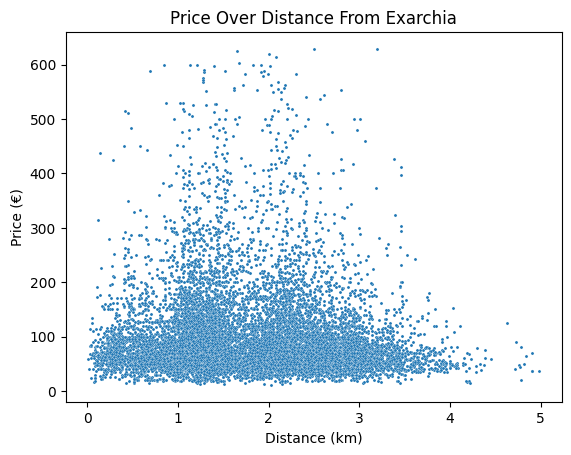

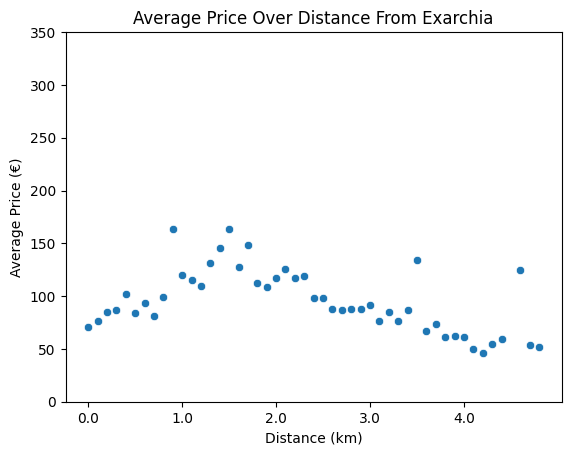

In [106]:
# Check POI Exarchia
POI_lat=37.986609 
POI_lon=23.734878
POI_name='Exarchia'

POI_column='distance_' + POI_name

## --------------- CALCULATE DISTANCE --------------
df[POI_column] = df.apply(lambda row: calc_distance(row['latitude'], row['longitude'], POI_lat, POI_lon), axis=1)


## --------------- SCATTERPLOT --------------
plt.figure(1)
sns.scatterplot(data=df[df['price'] < df['price'].quantile(0.99)], x=POI_column, y='price',s=5)
plt.title("Price Over Distance From " + POI_name) 
plt.ylabel("Price (€)")
plt.xlabel("Distance (km)")

## --------------- SCATTERPLOT with bins --------------
bin_width = 0.1 #correlate to 100m

# group data in bins
df['distance_bins'] = pd.cut(df[POI_column], bins=pd.interval_range(start=df[POI_column].min(), end=df[POI_column].max(), freq=bin_width))

# calculate average value
avg_price_by_bin = df.groupby('distance_bins')['price'].mean().reset_index()

# create label every 1 km
x_values = avg_price_by_bin['distance_bins']
x_max=df[POI_column].max() // 1
labels = np.arange(x_max+1)

avg_price_by_bin['distance_bins'] = avg_price_by_bin['distance_bins'].astype(str)

# Plot Scatterplot
plt.figure(2)
sns.scatterplot(data=avg_price_by_bin, x='distance_bins', y='price')

x_ticks = np.arange(len(x_values))
x_ticks = x_ticks[::10]  # Nur jeden 10. Wert auswählen
plt.xticks(x_ticks, labels)  # Nur jeden 10. Label auswählen
plt.ylim(0, 350) 
plt.title("Average Price Over Distance From " + POI_name) 
plt.ylabel("Average Price (€)")
plt.xlabel("Distance (km)")
plt.savefig('./images/average_price_distance_' + POI_name +'.png')

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\1013257740.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



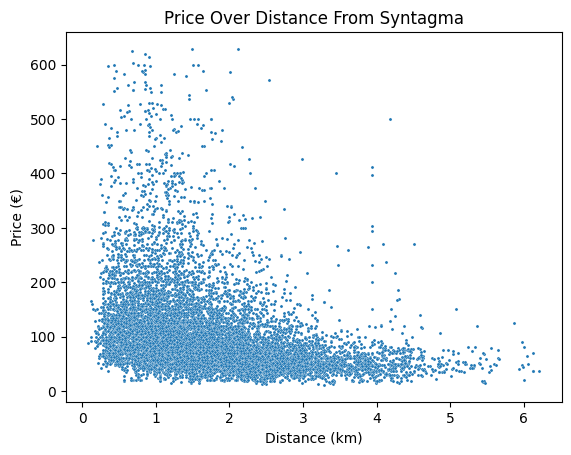

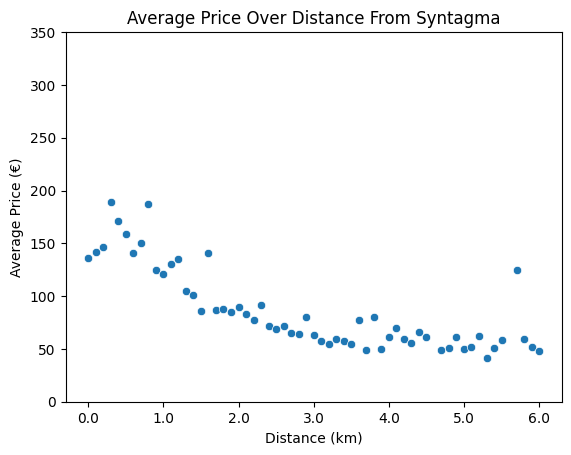

In [107]:
# Check POI Syntagma
POI_lat=37.975344 
POI_lon=23.736353
POI_name='Syntagma'

POI_column='distance_' + POI_name

## --------------- CALCULATE DISTANCE --------------
df[POI_column] = df.apply(lambda row: calc_distance(row['latitude'], row['longitude'], POI_lat, POI_lon), axis=1)


## --------------- SCATTERPLOT --------------
plt.figure(1)
sns.scatterplot(data=df[df['price'] < df['price'].quantile(0.99)], x=POI_column, y='price',s=5)
plt.title("Price Over Distance From " + POI_name) 
plt.ylabel("Price (€)")
plt.xlabel("Distance (km)")

## --------------- SCATTERPLOT with bins --------------
bin_width = 0.1 #correlate to 100m

# group data in bins
df['distance_bins'] = pd.cut(df[POI_column], bins=pd.interval_range(start=df[POI_column].min(), end=df[POI_column].max(), freq=bin_width))

# calculate average value
avg_price_by_bin = df.groupby('distance_bins')['price'].mean().reset_index()

# create label every 1 km
x_values = avg_price_by_bin['distance_bins']
x_max=df[POI_column].max() // 1
labels = np.arange(x_max+1)

avg_price_by_bin['distance_bins'] = avg_price_by_bin['distance_bins'].astype(str)

# Plot Scatterplot
plt.figure(2)
sns.scatterplot(data=avg_price_by_bin, x='distance_bins', y='price')

x_ticks = np.arange(len(x_values))
x_ticks = x_ticks[::10]  # Nur jeden 10. Wert auswählen
plt.xticks(x_ticks, labels)  # Nur jeden 10. Label auswählen
plt.ylim(0, 350) 
plt.title("Average Price Over Distance From " + POI_name) 
plt.ylabel("Average Price (€)")
plt.xlabel("Distance (km)")
plt.savefig('./images/average_price_distance_' + POI_name +'.png')

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\1285176841.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



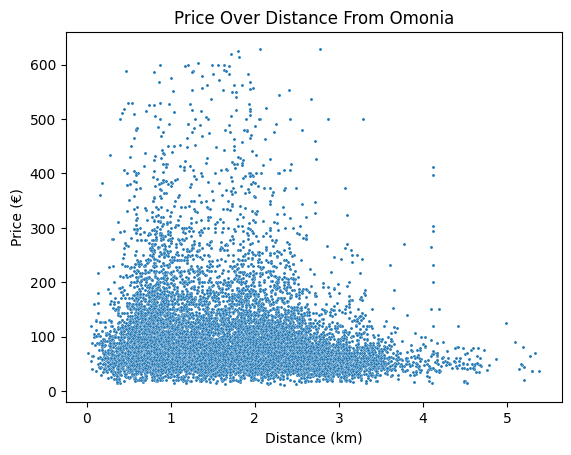

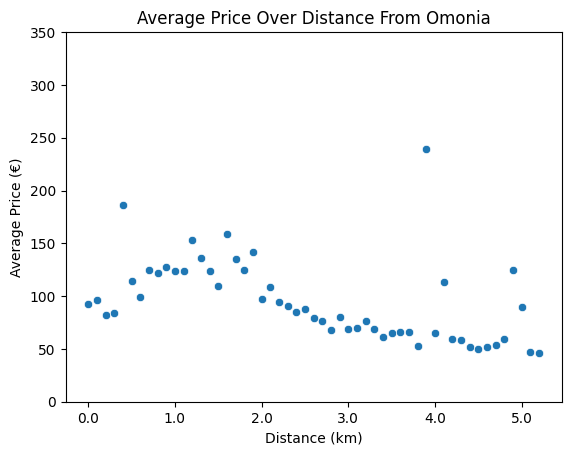

In [108]:
# Check POI Omonia
POI_lat=37.984063
POI_lon=23.728071
POI_name='Omonia'

POI_column='distance_' + POI_name

## --------------- CALCULATE DISTANCE --------------
df[POI_column] = df.apply(lambda row: calc_distance(row['latitude'], row['longitude'], POI_lat, POI_lon), axis=1)


## --------------- SCATTERPLOT --------------
plt.figure(1)
sns.scatterplot(data=df[df['price'] < df['price'].quantile(0.99)], x=POI_column, y='price',s=5)
plt.title("Price Over Distance From " + POI_name) 
plt.ylabel("Price (€)")
plt.xlabel("Distance (km)")

## --------------- SCATTERPLOT with bins --------------
bin_width = 0.1 #correlate to 100m

# group data in bins
df['distance_bins'] = pd.cut(df[POI_column], bins=pd.interval_range(start=df[POI_column].min(), end=df[POI_column].max(), freq=bin_width))

# calculate average value
avg_price_by_bin = df.groupby('distance_bins')['price'].mean().reset_index()

# create label every 1 km
x_values = avg_price_by_bin['distance_bins']
x_max=df[POI_column].max() // 1
labels = np.arange(x_max+1)

avg_price_by_bin['distance_bins'] = avg_price_by_bin['distance_bins'].astype(str)

# Plot Scatterplot
plt.figure(2)
sns.scatterplot(data=avg_price_by_bin, x='distance_bins', y='price')

x_ticks = np.arange(len(x_values))
x_ticks = x_ticks[::10]  # Nur jeden 10. Wert auswählen
plt.xticks(x_ticks, labels)  # Nur jeden 10. Label auswählen
plt.ylim(0, 350) 
plt.title("Average Price Over Distance From " + POI_name) 
plt.ylabel("Average Price (€)")
plt.xlabel("Distance (km)")
plt.savefig('./images/average_price_distance_' + POI_name +'.png')

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\1437625292.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\1437625292.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\1437625292.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\1437625292.py:50: Future

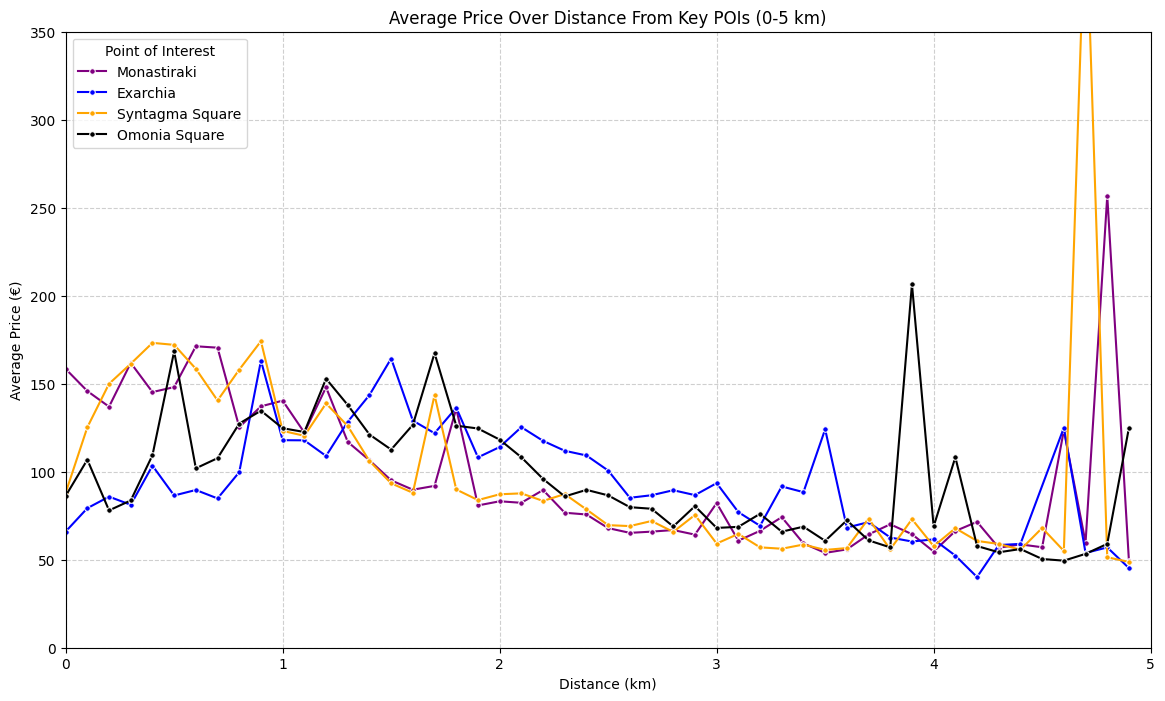

In [117]:
# POI Dictionary with color definitions
pois = [
    {'name': 'Monastiraki', 'lat': 37.9761, 'lon': 23.7254, 'color': 'purple'},
    {'name': 'Exarchia', 'lat': 37.986609, 'lon': 23.734878, 'color': 'blue'},
    {'name': 'Syntagma Square', 'lat': 37.975344, 'lon': 23.736353, 'color': 'orange'},
    {'name': 'Omonia Square', 'lat': 37.984063, 'lon': 23.728071, 'color': 'black'}
]


# List to store binned average data for each POI
all_poi_avg_data = []

# Dictionary to store colors for Seaborn palette
poi_colors = {}

# --- Fixed Bin Definition ---
bin_width = 0.1  # 0.1 km width (100m)
max_distance_for_bins = 5.0 # Max distance for bins is 5 km
fixed_bins = np.arange(0, max_distance_for_bins + bin_width, bin_width) # Bins from 0 to 5 km inclusive
# --- End Fixed Bin Definition ---


# Iterate through each POI (which is now a dictionary in the list)
for poi_data in pois: 
    poi_name_str = poi_data['name'] 
    poi_lat = poi_data['lat']       
    poi_lon = poi_data['lon']       
    poi_color = poi_data['color']   

    poi_colors[poi_name_str] = poi_color 

    poi_column = 'distance_' + poi_name_str.replace(" ", "_")

    # Calculate distance from POI
    df[poi_column] = df.apply(lambda row: calc_distance(row['latitude'], row['longitude'], poi_lat, poi_lon), axis=1)

 
    # Filter only distances within the 0-5km range before binning
    df_filtered = df[df[poi_column] <= max_distance_for_bins].copy() # Ensure only relevant data is binned

    # Create distance bins for the filtered data
    distance_bins = pd.cut(df_filtered[poi_column],
                           bins=fixed_bins,
                           right=False, # Intervals are [a, b), except the last one which can be [a,b]
                           include_lowest=True,
                           duplicates='drop')

    # Calculate average price per bin
    temp_df = pd.DataFrame({'distance_bins': distance_bins, 'price': df_filtered['price']}) # Use df_filtered
    avg_price_by_bin = temp_df.groupby('distance_bins')['price'].mean().reset_index()


    # Drop bins with NaN prices (no data)
    #avg_price_by_bin = avg_price_by_bin.dropna(subset=['price'])
    

    avg_price_by_bin['poi_name'] = poi_name_str 
    avg_price_by_bin['distance_km'] = avg_price_by_bin['distance_bins'].apply(lambda x: x.left if pd.notnull(x) else np.nan)
    
    all_poi_avg_data.append(avg_price_by_bin)


# Plot all POIs in one figure
combined_df = pd.concat(all_poi_avg_data, ignore_index=True)

plt.figure(figsize=(14, 8))

sns.lineplot(data=combined_df,
                x='distance_km',
                y='price',
                hue='poi_name',
                palette=poi_colors, 
                marker='o',
                markersize=4,
                lw=1.5)

plt.ylim(0, 350)
plt.title("Average Price Over Distance From Key POIs (0-5 km)") # Title adjusted
plt.ylabel("Average Price (€)")
plt.xlabel("Distance (km)")
plt.grid(True, linestyle='--', alpha=0.6)

# --- Fixed x-axis ticks ---
plt.xticks(np.arange(0, max_distance_for_bins + 1, 1)) 
plt.xlim(0, max_distance_for_bins) # Limit X-axis to 0-5 km
# --- End fixed x-axis ticks ---

plt.legend(title="Point of Interest")
plt.show()

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\4016791923.py:47: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\4016791923.py:47: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\4016791923.py:47: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\bet1btn\AppData\Local\Temp\ipykernel_31688\4016791923.py:47: Future

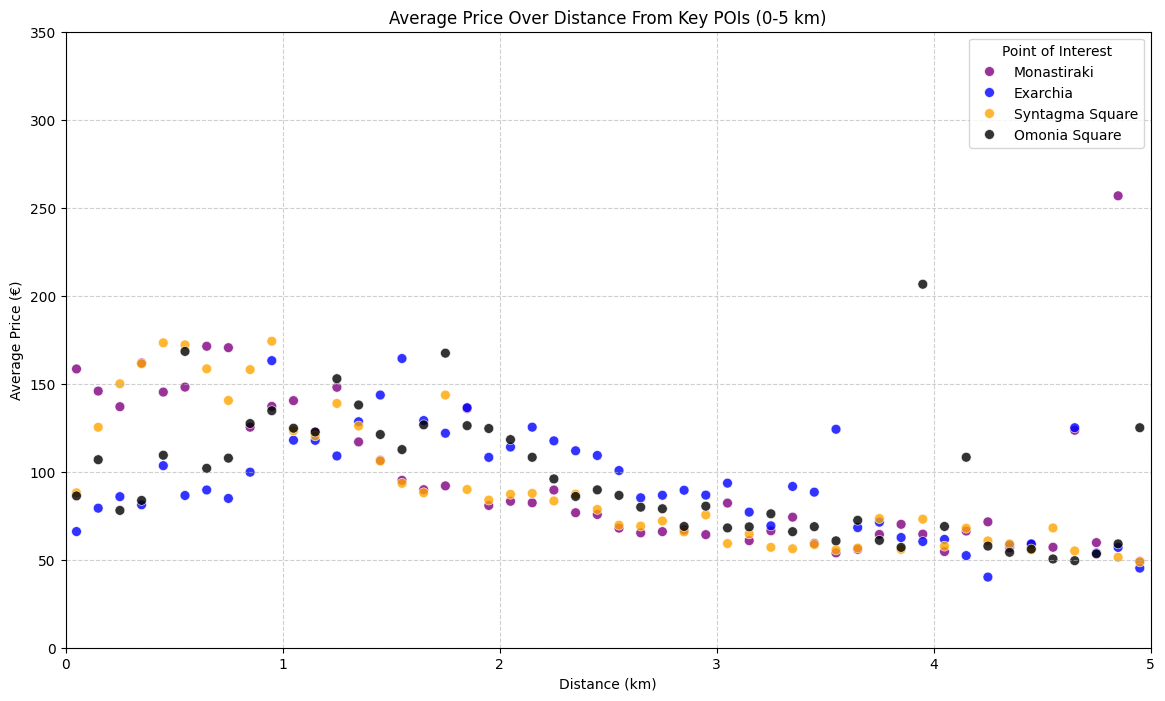

In [118]:
# POI Dictionary with color definitions
pois = [
    {'name': 'Monastiraki', 'lat': 37.9761, 'lon': 23.7254, 'color': 'purple'},
    {'name': 'Exarchia', 'lat': 37.986609, 'lon': 23.734878, 'color': 'blue'},
    {'name': 'Syntagma Square', 'lat': 37.975344, 'lon': 23.736353, 'color': 'orange'},
    {'name': 'Omonia Square', 'lat': 37.984063, 'lon': 23.728071, 'color': 'black'}
]

# List to store binned average data for each POI
all_poi_avg_data = []

# Dictionary to store colors for Seaborn palette
poi_colors = {}

# --- Fixed Bin Definition ---
bin_width = 0.1  # 0.1 km width (100m)
max_distance_for_bins = 5.0 # Max distance for bins is 5 km
fixed_bins = np.arange(0, max_distance_for_bins + bin_width, bin_width) # Bins from 0 to 5 km inclusive
# --- End Fixed Bin Definition ---

# Iterate through each POI (which is now a dictionary in the list)
for poi_data in pois:
    poi_name_str = poi_data['name']
    poi_lat = poi_data['lat']
    poi_lon = poi_data['lon']
    poi_color = poi_data['color']

    poi_colors[poi_name_str] = poi_color

    poi_column = 'distance_' + poi_name_str.replace(" ", "_")

    # Calculate distance from POI
    df[poi_column] = df.apply(lambda row: calc_distance(row['latitude'], row['longitude'], poi_lat, poi_lon), axis=1)

    # Filter only distances within the 0-5km range before binning
    df_filtered = df[df[poi_column] <= max_distance_for_bins].copy() # Ensure only relevant data is binned

    # Create distance bins for the filtered data
    distance_bins = pd.cut(df_filtered[poi_column],
                           bins=fixed_bins,
                           right=False, # Intervals are [a, b), except the last one which can be [a,b]
                           include_lowest=True,
                           duplicates='drop')

    # Calculate average price per bin
    temp_df = pd.DataFrame({'distance_bins': distance_bins, 'price': df_filtered['price']}) # Use df_filtered
    avg_price_by_bin = temp_df.groupby('distance_bins')['price'].mean().reset_index()

    avg_price_by_bin['poi_name'] = poi_name_str
    # Calculate the midpoint of each bin for the scatter plot x-coordinate
    avg_price_by_bin['distance_km_midpoint'] = avg_price_by_bin['distance_bins'].apply(lambda x: (x.left + x.right) / 2 if pd.notnull(x) else np.nan)

    all_poi_avg_data.append(avg_price_by_bin)

# Plot all POIs in one figure
combined_df = pd.concat(all_poi_avg_data, ignore_index=True)

plt.figure(figsize=(14, 8))

# Use sns.scatterplot 
sns.scatterplot(data=combined_df,
                x='distance_km_midpoint', # Use the midpoint for scatter plot
                y='price',
                hue='poi_name',
                palette=poi_colors,
                s=50, # Size of the markers
                alpha=0.8, # Transparency of the markers
                edgecolor='w', # White edge for better visibility
                linewidth=0.5) # Line width of the edge

plt.ylim(0, 350)
plt.title("Average Price Over Distance From Key POIs (0-5 km)")
plt.ylabel("Average Price (€)")
plt.xlabel("Distance (km)")
plt.grid(True, linestyle='--', alpha=0.6)

# --- Fixed x-axis ticks ---
plt.xticks(np.arange(0, max_distance_for_bins + 1, 1))
plt.xlim(0, max_distance_for_bins) # Limit X-axis to 0-5 km
# --- End fixed x-axis ticks ---

plt.legend(title="Point of Interest")
plt.savefig('./images/average_price_distance_all_pois.png')
plt.show()

## Present Distribution in Map
### Exploring Geospatial Data with Folium

The following cell is for development purposes only. It serves as a practical exercise to familiarize oneself with the `folium` library's syntax

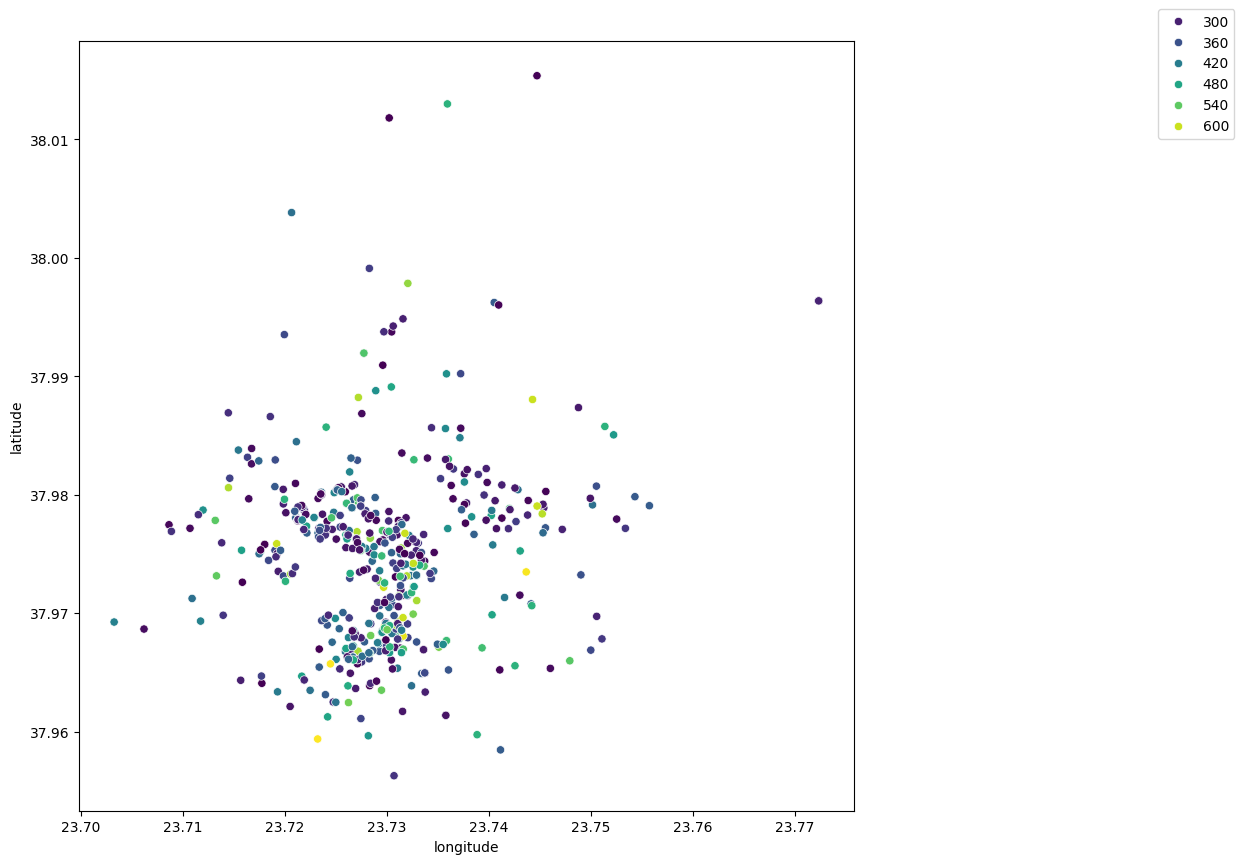

In [110]:
import folium


# Split the DataFrame into 4 parts based on the quantiles
q1 = df['price'].quantile(0.05)
q2 = df['price'].quantile(0.95)
q3 = df['price'].quantile(0.99)

# Create separate DataFrames for each split
df_q1 = df[df['price'] <= q1]
df_q2 = df[(df['price'] > q1) & (df['price'] <= q2)]
df_q3 = df[(df['price'] > q2) & (df['price'] <= q3)]
df_q4 = df[df['price'] > q3]


plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude',y='latitude',data=df_q3,hue='price',palette='viridis')
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1.05))
plt.show()



# Define the coordinates and name for a specific Point of Interest (POI), e.g., Syntagma Square
central_poi_lat = 37.975344
central_poi_lon = 23.736353
central_poi_name = 'Syntagma Square' # Renamed for clarity

# List of other Points of Interest (POIs), each represented as a dictionary
points_of_interest = [
    {'name': 'Acropolis', 'lat': 37.9715, 'lon': 23.7269, 'color': 'green'},
    {'name': 'Plaka', 'lat': 37.9744, 'lon': 23.7292, 'color': 'red'},
    {'name': 'Monastiraki', 'lat': 37.9761, 'lon': 23.7254, 'color': 'purple'},
    {'name': 'Exarchia', 'lat': 37.986609, 'lon': 23.734878, 'color': 'blue'},
    {'name': 'Syntagma Square', 'lat': 37.975344 , 'lon': 23.736353, 'color': 'orange'} # Changed color for Syntagma to differentiate
]

# Initialize the Folium map, centered around the 'Syntagma' coordinates
m = folium.Map(location=[central_poi_lat, central_poi_lon], zoom_start=14)

# Add markers for each point of interest:
for poi_item in points_of_interest:
    folium.Marker(
        location=[poi_item['lat'], poi_item['lon']], # Use 'lat' and 'lon' from the current dictionary
        popup=poi_item['name'],                     # Use 'name' from the current dictionary for the popup
        icon=folium.Icon(color=poi_item['color'], icon='info-sign') # Use 'color' from the dictionary for the marker icon
    ).add_to(m)

# Add markers for each venue (using CircleMarker)
for index, row in df_q3.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3, # Make these even smaller, perhaps, as they might be denser
        popup=f"Price: {row['price']}", # More descriptive popup
        color='blue',                   # Border color for venues
        fill=True,
        fill_color='blue',              # Fill color for venues
        fill_opacity=0.6
    ).add_to(m) 

# Display the map
m

Definition of a function to create maps according to a price selection

In [111]:
def create_athens_price_map(
    df,
    price_lower_quantile=0.01,
    price_upper_quantile=0.90,
    map_width=600,
    map_height=400,
    save_html=True,
    output_filename="athens_prices_map.html"
):
    """
    Creates a Folium map of Athens showing property prices and Points of Interest.

    Args:
        df (pd.DataFrame): The DataFrame containing property data. Must include
                           'price', 'latitude', and 'longitude' columns.
        price_lower_quantile (float): The lower quantile for price filtering.
                                      Default is 0.01 (the lowest 1% are ignored).
        price_upper_quantile (float): The upper quantile for price filtering.
                                      Default is 0.90 (the highest 10% are ignored).
        map_width (int): The width of the map in pixels.
        map_height (int): The height of the map in pixels.
        save_html (bool): Whether to save the map as an HTML file.
        output_filename (str): The filename for the saved HTML map,
                               if save_html is True.

    Returns:
        folium.Map: The Folium map object.
    """

    price_bound_low = df['price'].quantile(price_lower_quantile)
    price_bound_high = df['price'].quantile(price_upper_quantile)

    # Create separate DataFrame based on price filters
    df_price_split = df[(df['price'] > price_bound_low) & (df['price'] <= price_bound_high)]

    if df_price_split.empty:
        print("Warning: No data remaining after price filtering. Map will be empty.")
        # Create an empty map if no data remains
        m = folium.Map(location=[37.9761, 23.7254], zoom_start=14, control_scale=True, width=map_width, height=map_height)
        return m

    # Define the coordinates and name for a specific Point of Interest (POI), e.g., Syntagma Square
    central_poi_lat = 37.9761
    central_poi_lon = 23.7254

    # List of Points of Interest (POIs) 
    points_of_interest = [
        {'name': 'Monastiraki', 'lat': 37.9761, 'lon': 23.7254, 'color': 'purple'},
        {'name': 'Exarchia', 'lat': 37.986609, 'lon': 23.734878, 'color': 'blue'},
        {'name': 'Syntagma Square', 'lat': 37.975344, 'lon': 23.736353, 'color': 'orange'},
        {'name': 'Omonia Square', 'lat': 37.984063, 'lon': 23.728071, 'color': 'black'}
    ]

    # --- Create a Colormap ---
    # Define the range of your prices
    min_price = df_price_split['price'].min()
    max_price = df_price_split['price'].max()

    # Use the colormap module directly
    colormap_object = cm.linear.viridis.scale(min_price, max_price)

    # Initialize the Folium map, centered around the 'Syntagma' coordinates
    m = folium.Map(location=[central_poi_lat, central_poi_lon], zoom_start=14,
                   control_scale=True, width=map_width, height=map_height)

    # Add markers for each point of interest:
    for poi_item in points_of_interest:
        folium.Marker(
            location=[poi_item['lat'], poi_item['lon']],
            popup=poi_item['name'],
            icon=folium.Icon(color=poi_item['color'], icon='info-sign')
        ).add_to(m)

    # Add markers for each venue, with color based on price using the colormap
    for index, row in df_price_split.iterrows():
        price_value = row['price']
        # Get the color from the colormap for the current price
        marker_color = colormap_object(price_value)

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,
            popup=f"Price: ${price_value:.0f}", # Format price without decimals
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=1
        ).add_to(m)

    # Add the colormap to the map as a legend (very important for understanding the visualization!)
    colormap_object.caption = 'Price Range'
    m.add_child(colormap_object)

    if save_html:
        m.save(output_filename)
        print(f"Map saved to '{output_filename}'.")

    return m

In [112]:
print("\nCreating map for the high-price 15 %")
map = create_athens_price_map(
    df,
    price_lower_quantile=0.85,  # Ignore the lowest 85% of prices
    price_upper_quantile=0.99,  # Ignore the highest 1% of prices
    map_width=800,
    map_height=600,
    output_filename="./maps/athens_high_price_map.html"             # file name
)
map


Creating map for the high-price 15 %
Map saved to './maps/athens_high_price_map.html'.


In [113]:
print("\nCreating map for the low-price 15 %")
map = create_athens_price_map(
    df,
    price_lower_quantile=0.01, 
    price_upper_quantile=0.15,  
    map_width=800,
    map_height=600,
    output_filename="./maps/athens_low_price_map.html"             # file name
)
map


Creating map for the low-price 15 %
Map saved to './maps/athens_low_price_map.html'.
